In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection \
import train_test_split
import seaborn as sns

#import prettytable as pt

In [79]:
url = r"https://archive.ics.uci.edu/ml/" \
    + r"machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=[ "sepal -length", "sepal -width", "petal -length", "petal -width",
"Class"])

#data.to_csv("iris_data.csv")

<mark><font color=red size=4 face=SimHei>Question# 1.1 download IRIS dataset, remove Setosa flowers and assign labels 0 to to Versicolor and 1 to Virginica.<font><mark>


In [80]:
a=list(range(0,50))
data.drop(index=a,inplace=True)
label=[]
#print(data.index)
for i in range(len(data)):
    if data["Class"][i+50]=="Iris-versicolor":
        label.append(0)
    elif data["Class"][i+50]=="Iris-virginica":
        label.append(1)
#print(label)
data["label"]=label
Q5_data= pd.read_csv(url, names=[ "sepal -length", "sepal -width", "petal -length", "petal -width",
"Class"])
Q5_data.drop(index=a,inplace=True)
label=[]
#print(data.index)
for i in range(len(Q5_data)):
    if Q5_data["Class"][i+50]=="Iris-versicolor":
        label.append(0)
    elif Q5_data["Class"][i+50]=="Iris-virginica":
        label.append(1)
#print(label)
Q5_data["label"]=label

# data["Class"]=data["Class"].replace("Iris-versicolor",0)
# data["Class"]=data["Class"].replace("Iris-virginica",1)
#data.to_csv("iris_data1.csv")


<mark><font color=red size=4 face=SimHei>Question#1.2 for each label and feature compute statistical averages (from training set!) and put them in the following table:<font><mark>

In [81]:
#versicolor_mean=data['petal -length'].loc[data['label'] == 0].mean()
mean_0=[]
mean_0.append(data.loc[(data["label"]==0),:]["petal -length"].mean())
mean_0.append(data.loc[(data["label"]==0),:]["petal -width"].mean())
mean_0.append(data.loc[(data["label"]==0),:]["sepal -length"].mean())
mean_0.append(data.loc[(data["label"]==0),:]["sepal -width"].mean())
sd_0=[]
sd_0.append(data.loc[(data["label"]==0),:]["petal -length"].std())
sd_0.append(data.loc[(data["label"]==0),:]["petal -width"].std())
sd_0.append(data.loc[(data["label"]==0),:]["sepal -length"].std())
sd_0.append(data.loc[(data["label"]==0),:]["sepal -width"].std())
mean_1=[]
mean_1.append(data.loc[(data["label"]==1),:]["petal -length"].mean())
mean_1.append(data.loc[(data["label"]==1),:]["petal -width"].mean())
mean_1.append(data.loc[(data["label"]==1),:]["sepal -length"].mean())
mean_1.append(data.loc[(data["label"]==1),:]["sepal -width"].mean())
sd_1=[]
sd_1.append(data.loc[(data["label"]==1),:]["petal -length"].std())
sd_1.append(data.loc[(data["label"]==1),:]["petal -width"].std())
sd_1.append(data.loc[(data["label"]==1),:]["sepal -length"].std())
sd_1.append(data.loc[(data["label"]==1),:]["sepal -width"].std())
mean_all=[]
mean_all.append(data["petal -length"].mean())
mean_all.append(data["petal -width"].mean())
mean_all.append(data["sepal -length"].mean())
mean_all.append(data["sepal -width"].mean())
sd_all=[]
sd_all.append(data.loc[(data["label"]==1),:]["petal -length"].std())
sd_all.append(data.loc[(data["label"]==1),:]["petal -width"].std())
sd_all.append(data.loc[(data["label"]==1),:]["sepal -length"].std())
sd_all.append(data.loc[(data["label"]==1),:]["sepal -width"].std())
Q1_d={"Feature":pd.Series(["Petal Lengh","Petal Width","Sepal Lengh","Sepal Width"]),
      "μ0":pd.Series(mean_0),
      "σ0":pd.Series(sd_0),
      "μ1":pd.Series(mean_1),
      "σ1":pd.Series(sd_1),
      "μall":pd.Series(mean_all),
      "σall":pd.Series(sd_all)}
Q1_df=pd.DataFrame(Q1_d)
print(Q1_df)



       Feature     μ0        σ0     μ1        σ1   μall      σall
0  Petal Lengh  4.260  0.469911  5.552  0.551895  4.906  0.551895
1  Petal Width  1.326  0.197753  2.026  0.274650  1.676  0.274650
2  Sepal Lengh  5.936  0.516171  6.588  0.635880  6.262  0.635880
3  Sepal Width  2.770  0.313798  2.974  0.322497  2.872  0.322497


<mark><font color=red size=4 face=SimHei> Question# 1.3 for each class, compute the correlation matrix for your 4 features. Which features have the highest and lowest cor- relations?<font><mark>

In [82]:
corrM=Q1_df.corr()
print(corrM)

            μ0        σ0        μ1        σ1      μall      σall
μ0    1.000000  0.975090  0.979489  0.967863  0.994450  0.967863
σ0    0.975090  1.000000  0.987055  0.974510  0.986369  0.974510
μ1    0.979489  0.987055  1.000000  0.997539  0.995253  0.997539
σ1    0.967863  0.974510  0.997539  1.000000  0.988352  1.000000
μall  0.994450  0.986369  0.995253  0.988352  1.000000  0.988352
σall  0.967863  0.974510  0.997539  1.000000  0.988352  1.000000


<mark><font color=red size=4 face=SimHei> Question#1.4 discuss your findings<font><mark>

petel lengh and petal width is more important for fianl result

<mark><font color=red size=4 face=SimHei> Question#2.1generate histograms of pairwise relationships for a train- ing set (include these histograms in submitted homework). X rain. You can use ”pairplot” method of the seaborn package: <font><mark>

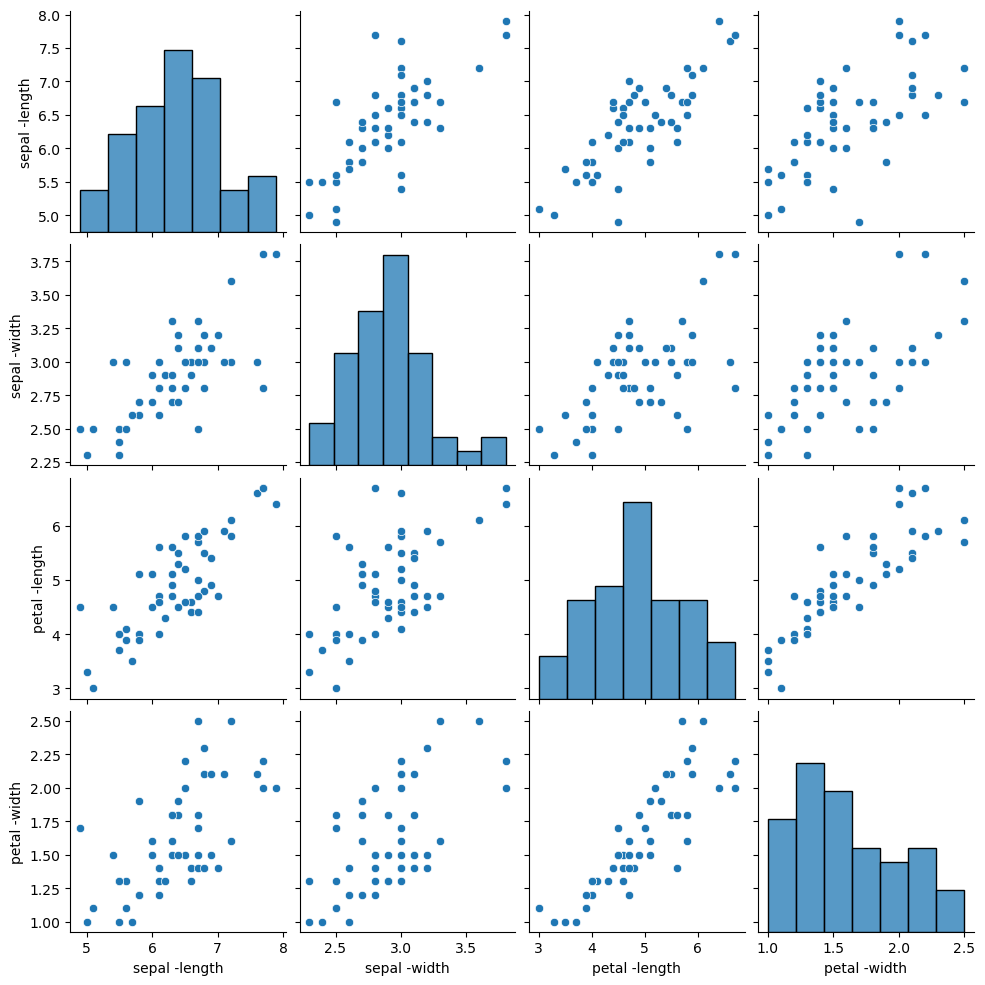

In [83]:
X = data[["sepal -length","sepal -width","petal -length","petal -width"]]
y = data["label"]
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.5)
features = ["sepal -length", "sepal -width",
"petal -length", "petal -width"]
pair_plot = sns.pairplot(X_train[features])
plt.show()

<mark><font color=red size=4 face=SimHei>Question#2.2 examine the histograms and for each feature design a simple classifier (”weak learner”) for labels. Your classifier can only consist of simple comparison using that single feature. For example,<font><mark>

In [84]:
from socket import TCP_NOTSENT_LOWAT

X_test["sepal_length_label"]=X_test["sepal -length"].apply(lambda x: 1 if x>data["sepal -length"].median() else 0)
X_test["sepal_width_label"]=X_test["sepal -width"].apply(lambda x: 1 if x>data["sepal -width"].median() else 0)
X_test["petal -length_label"]=X_test["petal -length"].apply(lambda x: 1 if x>data["petal -length"].median() else 0)
X_test["petal -width_label"]=X_test["petal -width"].apply(lambda x: 1 if x>data["petal -width"].median() else 0)
X_test.loc[:,"Ture_lable"]=y_test


#Ture Positive
TP_pl=X_test.loc[(X_test["petal -length_label"]==1)&(X_test["Ture_lable"]==1),:]["Ture_lable"].count()
TP_pw=X_test.loc[(X_test["petal -width_label"]==1)&(X_test["Ture_lable"]==1),:]["Ture_lable"].count()
TP_sl=X_test.loc[(X_test["sepal_length_label"]==1)&(X_test["Ture_lable"]==1),:]["Ture_lable"].count()
TP_sw=X_test.loc[(X_test["sepal_width_label"]==1)&(X_test["Ture_lable"]==1),:]["Ture_lable"].count()

#False positive
FP_pl=X_test.loc[(X_test["petal -length_label"]==1)&(X_test["Ture_lable"]==0),:]["Ture_lable"].count()
FP_pw=X_test.loc[(X_test["petal -width_label"]==1)&(X_test["Ture_lable"]==0),:]["Ture_lable"].count()
FP_sl=X_test.loc[(X_test["sepal_length_label"]==1)&(X_test["Ture_lable"]==0),:]["Ture_lable"].count()
FP_sw=X_test.loc[(X_test["sepal_width_label"]==1)&(X_test["Ture_lable"]==0),:]["Ture_lable"].count()

#Ture Negative
TN_pl=X_test.loc[(X_test["petal -length_label"]==0)&(X_test["Ture_lable"]==0),:]["Ture_lable"].count()
TN_pw=X_test.loc[(X_test["petal -width_label"]==0)&(X_test["Ture_lable"]==0),:]["Ture_lable"].count()
TN_sl=X_test.loc[(X_test["sepal_length_label"]==0)&(X_test["Ture_lable"]==0),:]["Ture_lable"].count()
TN_sw=X_test.loc[(X_test["sepal_width_label"]==0)&(X_test["Ture_lable"]==0),:]["Ture_lable"].count()

#False Negative
FN_pl=X_test.loc[(X_test["petal -length_label"]==0)&(X_test["Ture_lable"]==1),:]["Ture_lable"].count()
FN_pw=X_test.loc[(X_test["petal -width_label"]==0)&(X_test["Ture_lable"]==1),:]["Ture_lable"].count()
FN_sl=X_test.loc[(X_test["sepal_length_label"]==0)&(X_test["Ture_lable"]==1),:]["Ture_lable"].count()
FN_sw=X_test.loc[(X_test["sepal_width_label"]==0)&(X_test["Ture_lable"]==1),:]["Ture_lable"].count()

#Accuracy
ACC_pl=(TN_pl+TP_pl)/50
ACC_pw=(TN_pw+TP_pw)/50
ACC_sl=(TN_sl+TP_sl)/50
ACC_sw=(TN_sw+TP_sw)/50
#X_test['TP_pl'] = np.where((X_test['petal -length_label'] == 1)  & (X_test['Ture_lable'] == 1),X_test['petal -length_label'],np.nan)
#X_test.to_csv("x_test.csv")
Q2_d={"Classifier":pd.Series(["Petal Lengh","Petal Width","Sepal Lengh","Sepal Width"]),
      "TP":pd.Series([TP_pl,TP_pw,TP_sl,TP_sw]),
      "TN":pd.Series([TN_pl,TN_pw,TN_sl,TN_sw]),
      "FP":pd.Series([FP_pl,FP_pw,FP_sl,FP_sw]),
      "FN":pd.Series([FN_pl,FN_pw,FN_sl,FN_sw]),
      "ACC":pd.Series([ACC_pl,ACC_pw,ACC_sl,ACC_sw])}
Q2_df=pd.DataFrame(Q2_d)


print(Q2_df)


    Classifier  TP  TN  FP  FN   ACC
0  Petal Lengh  24  22   0   4  0.92
1  Petal Width  27  21   1   1  0.96
2  Sepal Lengh  15  21   1  13  0.72
3  Sepal Width  16  17   5  12  0.66


<mark><font color=red size=4 face=SimHei>Question#2.3 discuss your findings and rank your ”weak” learners by ac- curacy (from most accurate to least accurate)<font><mark>

for accuracy Petal lengh > Peltal Width > Sepal Lengh> Sepal Width. It's give us more evidence that petal is more important for fianl result

<mark><font color=red size=4 face=SimHei>Question#3.1 For each such ensemble classifier, split data into training and test. Apply your classifiers on testing data, compute confusion matrix and summarize the results in a table below (note that no training is done, we are just combining the ”weak” learners).
<font><mark>

In [85]:
data["sepal_length_label"]=data["sepal -length"].apply(lambda x: 1 if x>data["sepal -length"].median() else 0)
data["sepal_width_label"]=data["sepal -width"].apply(lambda x: 1 if x>data["sepal -width"].median() else 0)
data["petal -length_label"]=data["petal -length"].apply(lambda x: 1 if x>data["petal -length"].median() else 0)
data["petal -width_label"]=data["petal -width"].apply(lambda x: 1 if x>data["petal -width"].median() else 0)

Q3_1_2_3=[]
for i in range(len(data)):
    if (data["petal -length_label"][i+50]+data["petal -width_label"][i+50]+data["sepal_length_label"][i+50])>=2:
        Q3_1_2_3.append(1)
    else:
        Q3_1_2_3.append(0)
data["Q3_1_2_3"]=Q3_1_2_3

Q3_1_2_4=[]
for i in range(len(data)):
    if (data["petal -length_label"][i+50]+data["petal -width_label"][i+50]+data["sepal_width_label"][i+50])>=2:
        Q3_1_2_4.append(1)
    else:
        Q3_1_2_4.append(0)
data["Q3_1_2_4"]=Q3_1_2_4

Q3_1_3_4=[]
for i in range(len(data)):
    if (data["petal -length_label"][i+50]+data["sepal_length_label"][i+50]+data["sepal_width_label"][i+50])>=2:
        Q3_1_3_4.append(1)
    else:
        Q3_1_3_4.append(0)
data["Q3_1_3_4"]=Q3_1_3_4

Q3_2_3_4=[]
for i in range(len(data)):
    if (data["petal -width_label"][i+50]+data["sepal_length_label"][i+50]+data["sepal_width_label"][i+50])>=2:
        Q3_2_3_4.append(1)
    else:
        Q3_2_3_4.append(0)
data["Q3_2_3_4"]=Q3_2_3_4
#data.to_csv("Q3.csv")

#print(data)

In [86]:
X3_1 = data[["sepal -length","sepal -width","petal -length","petal -width","Q3_1_2_3","Q3_1_2_4","Q3_1_3_4","Q3_2_3_4"]]
y3_1 = data["label"]
X3_1_train,X3_1_test,y3_1_train,y3_1_test=train_test_split(X3_1, y3_1, train_size=0.5)
X3_1_test.loc[:,"Ture_lable"]=y3_1_test
X3_1_test.to_csv("Q3.csv")
TP_Q3_1_2_3=X3_1_test.loc[(X3_1_test["Q3_1_2_3"]==1)&(X3_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
FP_Q3_1_2_3=X3_1_test.loc[(X3_1_test["Q3_1_2_3"]==1)&(X3_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
TN_Q3_1_2_3=X3_1_test.loc[(X3_1_test["Q3_1_2_3"]==0)&(X3_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
FN_Q3_1_2_3=X3_1_test.loc[(X3_1_test["Q3_1_2_3"]==0)&(X3_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
ACC_Q3_1_2_3=(TN_Q3_1_2_3+TP_Q3_1_2_3)/50
# (TP_Q3_1_2_3,FP_Q3_1_2_3,TN_Q3_1_2_3,FN_Q3_1_2_3)
TP_Q3_1_2_4=X3_1_test.loc[(X3_1_test["Q3_1_2_4"]==1)&(X3_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
FP_Q3_1_2_4=X3_1_test.loc[(X3_1_test["Q3_1_2_4"]==1)&(X3_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
TN_Q3_1_2_4=X3_1_test.loc[(X3_1_test["Q3_1_2_4"]==0)&(X3_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
FN_Q3_1_2_4=X3_1_test.loc[(X3_1_test["Q3_1_2_4"]==0)&(X3_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
ACC_Q3_1_2_4=(TN_Q3_1_2_4+TP_Q3_1_2_4)/50
#print(TP_Q3_1_2_3,X3_1_test["Ture_lable"].sum())
TP_Q3_1_3_4=X3_1_test.loc[(X3_1_test["Q3_1_3_4"]==1)&(X3_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
FP_Q3_1_3_4=X3_1_test.loc[(X3_1_test["Q3_1_3_4"]==1)&(X3_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
TN_Q3_1_3_4=X3_1_test.loc[(X3_1_test["Q3_1_3_4"]==0)&(X3_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
FN_Q3_1_3_4=X3_1_test.loc[(X3_1_test["Q3_1_3_4"]==0)&(X3_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
ACC_Q3_1_3_4=(TN_Q3_1_3_4+TP_Q3_1_3_4)/50

TP_Q3_2_3_4=X3_1_test.loc[(X3_1_test["Q3_2_3_4"]==1)&(X3_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
FP_Q3_2_3_4=X3_1_test.loc[(X3_1_test["Q3_2_3_4"]==1)&(X3_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
TN_Q3_2_3_4=X3_1_test.loc[(X3_1_test["Q3_2_3_4"]==0)&(X3_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
FN_Q3_2_3_4=X3_1_test.loc[(X3_1_test["Q3_2_3_4"]==0)&(X3_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
ACC_Q3_2_3_4=(TN_Q3_2_3_4+TP_Q3_2_3_4)/50

Q3_d={"Classifier":pd.Series(["(1),(2),(3)","(1),(2),(4)","(1),(3),(4)","(2),(3),(4)"]),
      "TP":pd.Series([TP_Q3_1_2_3,TP_Q3_1_2_4,TP_Q3_1_3_4,TP_Q3_2_3_4]),
      "TN":pd.Series([TN_Q3_1_2_3,TN_Q3_1_2_4,TN_Q3_1_3_4,FP_Q3_2_3_4]),
      "FP":pd.Series([FP_Q3_1_2_3,FP_Q3_1_2_4,FP_Q3_1_3_4,FN_Q3_2_3_4]),
      "FN":pd.Series([FN_Q3_1_2_3,FN_Q3_1_2_4,FN_Q3_1_3_4,FN_Q3_2_3_4]),
      "ACC":pd.Series([ACC_Q3_1_2_3,ACC_Q3_1_2_4,ACC_Q3_1_3_4,ACC_Q3_2_3_4])}
Q3_df=pd.DataFrame(Q3_d)
print(Q3_df)


    Classifier  TP  TN  FP  FN   ACC
0  (1),(2),(3)  17  27   1   5  0.88
1  (1),(2),(4)  18  27   1   4  0.90
2  (1),(3),(4)  15  23   5   7  0.76
3  (2),(3),(4)  16   5   6   6  0.78


<mark><font color=red size=4 face=SimHei>Question# 3.2 discuss your findings and rank your ensembles learners by accuracy (from most accurate to least accurate<font><mark>

(1),(2),(3)>(1),(2),(4)>(1),(3),(4)>(2),(3),(4)
When the data is put together, petal length and petal width play a more important role

<mark><font color=red size=4 face=SimHei>Question# 3.3 compare ”weak learners” and ensemble results.<font><mark>

compare the week learners and ensemble is more average. the acc stay on 80-90%

<mark><font color=red size=4 face=SimHei>Question#4.1 you design 4 such density-based classfiers, one for each of the 4 features. For each classifier, compute the confusion matrix (from a testing set! as before) and summarize them in a table below<font><mark>

In [87]:
from scipy.stats import norm
Q4_X = data[["sepal -length","sepal -width","petal -length","petal -width","label"]]
Q4_y = data["label"]
Q4_X_train,Q4_X_test,Q4_y_train,Q4_y_test=train_test_split(Q4_X, Q4_y, train_size=0.5)
#print(Q4_X_train)
Q4_1_mu_sl=Q4_X_train["sepal -length"].loc[Q4_X_train['label'] == 1].mean()
Q4_0_mu_sl=Q4_X_train["sepal -length"].loc[Q4_X_train['label'] == 0].mean()
Q4_1_mu_sw=Q4_X_train["sepal -width"].loc[Q4_X_train['label'] == 1].mean()
Q4_0_mu_sw=Q4_X_train["sepal -width"].loc[Q4_X_train['label'] == 0].mean()
Q4_1_mu_pl=Q4_X_train["petal -length"].loc[Q4_X_train['label'] == 1].mean()
Q4_0_mu_pl=Q4_X_train["petal -length"].loc[Q4_X_train['label'] == 0].mean()
Q4_1_mu_pw=Q4_X_train["petal -width"].loc[Q4_X_train['label'] == 1].mean()
Q4_0_mu_pw=Q4_X_train["petal -width"].loc[Q4_X_train['label'] == 0].mean()
Q4_1_std_sl=Q4_X_train["sepal -length"].loc[Q4_X_train['label'] == 1].std()
Q4_0_std_sl=Q4_X_train["sepal -length"].loc[Q4_X_train['label'] == 0].std()
Q4_1_std_sw=Q4_X_train["sepal -width"].loc[Q4_X_train['label'] == 1].std()
Q4_0_std_sw=Q4_X_train["sepal -width"].loc[Q4_X_train['label'] == 0].std()
Q4_1_std_pl=Q4_X_train["petal -length"].loc[Q4_X_train['label'] == 1].std()
Q4_0_std_pl=Q4_X_train["petal -length"].loc[Q4_X_train['label'] == 0].std()
Q4_1_std_pw=Q4_X_train["petal -width"].loc[Q4_X_train['label'] == 1].std()
Q4_0_std_pw=Q4_X_train["petal -width"].loc[Q4_X_train['label'] == 0].std()

#print(Q4_X_test,"\n",Q4_X_test.iloc[[0],[1]])
Q4_petal_length=[]
for i in range(len(Q4_X_test)):
    P_0=norm.pdf((Q4_X_test.iloc[[i],[2]] - Q4_0_mu_pl)/Q4_0_std_pl)
    P_1=norm.pdf((Q4_X_test.iloc[[i],[2]] - Q4_1_mu_pl)/Q4_1_std_pl)
    if P_0>P_1:
        Q4_petal_length.append(0)
    else:
        Q4_petal_length.append(1)
Q4_X_test["pl_label"]=Q4_petal_length

Q4_petal_width=[]
for i in range(len(Q4_X_test)):
    P_0=norm.pdf((Q4_X_test.iloc[[i],[3]] - Q4_0_mu_pw)/Q4_0_std_pw)
    P_1=norm.pdf((Q4_X_test.iloc[[i],[3]] - Q4_1_mu_pw)/Q4_1_std_pw)
    if P_0>P_1:
        Q4_petal_width.append(0)
    else:
        Q4_petal_width.append(1)
Q4_X_test["pw_label"]=Q4_petal_width

Q4_sepal_length=[]
for i in range(len(Q4_X_test)):
    P_0=norm.pdf((Q4_X_test.iloc[[i],[0]] - Q4_0_mu_sl)/Q4_0_std_sl)
    P_1=norm.pdf((Q4_X_test.iloc[[i],[0]] - Q4_1_mu_sl)/Q4_1_std_sl)
    if P_0>P_1:
        Q4_sepal_length.append(0)
    else:
        Q4_sepal_length.append(1)
Q4_X_test["sl_label"]=Q4_sepal_length

Q4_sepal_width=[]
for i in range(len(Q4_X_test)):
    P_0=norm.pdf((Q4_X_test.iloc[[i],[1]] - Q4_0_mu_sw)/Q4_0_std_sw)
    P_1=norm.pdf((Q4_X_test.iloc[[i],[1]] - Q4_1_mu_sw)/Q4_1_std_sw)
    if P_0>P_1:
        Q4_sepal_width.append(0)
    else:
        Q4_sepal_width.append(1)
Q4_X_test["sw_label"]=Q4_sepal_width
Q4_X_test.to_csv("Q4.csv")
#print(Q4_X_test)
#Ture Positive
Q4_TP_pl=Q4_X_test.loc[(Q4_X_test["pl_label"]==1)&(Q4_X_test["label"]==1),:]["label"].count()
Q4_TP_pw=Q4_X_test.loc[(Q4_X_test["pw_label"]==1)&(Q4_X_test["label"]==1),:]["label"].count()
Q4_TP_sl=Q4_X_test.loc[(Q4_X_test["sl_label"]==1)&(Q4_X_test["label"]==1),:]["label"].count()
Q4_TP_sw=Q4_X_test.loc[(Q4_X_test["sw_label"]==1)&(Q4_X_test["label"]==1),:]["label"].count()


#False Positive
Q4_FP_pl=Q4_X_test.loc[(Q4_X_test["pl_label"]==1)&(Q4_X_test["label"]==0),:]["label"].count()
Q4_FP_pw=Q4_X_test.loc[(Q4_X_test["pw_label"]==1)&(Q4_X_test["label"]==0),:]["label"].count()
Q4_FP_sl=Q4_X_test.loc[(Q4_X_test["sl_label"]==1)&(Q4_X_test["label"]==0),:]["label"].count()
Q4_FP_sw=Q4_X_test.loc[(Q4_X_test["sw_label"]==1)&(Q4_X_test["label"]==0),:]["label"].count()


#True Negative
Q4_TN_pl=Q4_X_test.loc[(Q4_X_test["pl_label"]==0)&(Q4_X_test["label"]==0),:]["label"].count()
Q4_TN_pw=Q4_X_test.loc[(Q4_X_test["pw_label"]==0)&(Q4_X_test["label"]==0),:]["label"].count()
Q4_TN_sl=Q4_X_test.loc[(Q4_X_test["sl_label"]==0)&(Q4_X_test["label"]==0),:]["label"].count()
Q4_TN_sw=Q4_X_test.loc[(Q4_X_test["sw_label"]==0)&(Q4_X_test["label"]==0),:]["label"].count()

#False Negative
Q4_FN_pl=Q4_X_test.loc[(Q4_X_test["pl_label"]==0)&(Q4_X_test["label"]==0),:]["label"].count()
Q4_FN_pw=Q4_X_test.loc[(Q4_X_test["pw_label"]==0)&(Q4_X_test["label"]==0),:]["label"].count()
Q4_FN_sl=Q4_X_test.loc[(Q4_X_test["sl_label"]==0)&(Q4_X_test["label"]==0),:]["label"].count()
Q4_FN_sw=Q4_X_test.loc[(Q4_X_test["sw_label"]==0)&(Q4_X_test["label"]==0),:]["label"].count()
#Accuracy
Q4_ACC_pl=(Q4_TN_pl+Q4_TP_pl)/50
Q4_ACC_pw=(Q4_TN_pw+Q4_TP_pw)/50
Q4_ACC_sl=(Q4_TN_sl+Q4_TP_sl)/50
Q4_ACC_sw=(Q4_TN_sw+Q4_TP_sw)/50

Q4_d={"Classifier":pd.Series(["(1) Petal Lengh","(2) Petal Width","(3) Sepal Lengh","(4) Sepal Width"]),
      "TP":pd.Series([Q4_TP_pl,Q4_TP_pw,Q4_FP_sl,Q4_FP_sw]),
      "TN":pd.Series([Q4_TN_pl,Q4_TN_pw,Q4_TN_sl,Q4_TN_sw]),
      "FP":pd.Series([Q4_FP_pl,Q4_FP_pw,Q4_FP_sl,Q4_FP_sw]),
      "FN":pd.Series([Q4_FN_pl,Q4_FN_pw,Q4_FN_sl,Q4_FN_sw]),
      "ACC":pd.Series([Q4_ACC_pl,Q4_ACC_pw,Q4_ACC_sl,Q4_ACC_sw])}
Q4_df=pd.DataFrame(Q4_d)
print(Q4_df)

        Classifier  TP  TN  FP  FN   ACC
0  (1) Petal Lengh  22  22   1  22  0.88
1  (2) Petal Width  24  22   1  22  0.92
2  (3) Sepal Lengh   3  20   3  20  0.74
3  (4) Sepal Width   5  18   5  18  0.64


<mark><font color=red size=4 face=SimHei>Question#4.2 discuss your findings and rank your density-based ”weak” learners by accuracy (from most accurate to least accurate<font><mark>

(1)Petal Lengh=(2Petal Width>(3)Sepal Lengh >(4)Sepal Width
The results of weak learners in this step are similar to that of the weaker leaner in the previous step. Petal play the more impoortant role for the acc.

<mark><font color=red size=4 face=SimHei>Question#5.1 For each such ensemble classifier, compute confusion matrix (on testing data!) and summarize the results in a table below<font><mark>

In [88]:
Q5_1_mu_sl=data["sepal -length"].loc[data['label'] == 1].mean()
Q5_0_mu_sl=data["sepal -length"].loc[data['label'] == 0].mean()
Q5_1_mu_sw=data["sepal -width"].loc[data['label'] == 1].mean()
Q5_0_mu_sw=data["sepal -width"].loc[data['label'] == 0].mean()
Q5_1_mu_pl=data["petal -length"].loc[data['label'] == 1].mean()
Q5_0_mu_pl=data["petal -length"].loc[data['label'] == 0].mean()
Q5_1_mu_pw=data["petal -width"].loc[data['label'] == 1].mean()
Q5_0_mu_pw=data["petal -width"].loc[data['label'] == 0].mean()
Q5_1_std_sl=data["sepal -length"].loc[data['label'] == 1].std()
Q5_0_std_sl=data["sepal -length"].loc[data['label'] == 0].std()
Q5_1_std_sw=data["sepal -width"].loc[data['label'] == 1].std()
Q5_0_std_sw=data["sepal -width"].loc[data['label'] == 0].std()
Q5_1_std_pl=data["petal -length"].loc[data['label'] == 1].std()
Q5_0_std_pl=data["petal -length"].loc[data['label'] == 0].std()
Q5_1_std_pw=data["petal -width"].loc[data['label'] == 1].std()
Q5_0_std_pw=data["petal -width"].loc[data['label'] == 0].std()

Q5_petal_length=[]
for i in range(len(Q5_data)):
    P_0=norm.pdf((Q5_data.iloc[[i],[2]] - Q5_0_mu_pl)/Q5_0_std_pl)
    P_1=norm.pdf((Q5_data.iloc[[i],[2]] - Q5_1_mu_pl)/Q5_1_std_pl)
    if P_0>P_1:
        Q5_petal_length.append(0)
    else:
        Q5_petal_length.append(1)
Q5_data["pl_label"]=Q5_petal_length

Q5_petal_width=[]
for i in range(len(Q5_data)):
    P_0=norm.pdf((Q5_data.iloc[[i],[3]] - Q5_0_mu_pw)/Q5_0_std_pw)
    P_1=norm.pdf((Q5_data.iloc[[i],[3]] - Q5_1_mu_pw)/Q5_1_std_pw)
    if P_0>P_1:
        Q5_petal_width.append(0)
    else:
        Q5_petal_width.append(1)
Q5_data["pw_label"]=Q5_petal_width

Q5_sepal_length=[]
for i in range(len(Q5_data)):
    P_0=norm.pdf((Q5_data.iloc[[i],[0]] - Q5_0_mu_sl)/Q5_0_std_sl)
    P_1=norm.pdf((Q5_data.iloc[[i],[0]] - Q5_1_mu_sl)/Q5_1_std_sl)
    if P_0>P_1:
        Q5_sepal_length.append(0)
    else:
        Q5_sepal_length.append(1)
Q5_data["sl_label"]=Q5_sepal_length

Q5_sepal_width=[]
for i in range(len(Q5_data)):
    P_0=norm.pdf((Q5_data.iloc[[i],[1]] - Q5_0_mu_sw)/Q5_0_std_sw)
    P_1=norm.pdf((Q5_data.iloc[[i],[1]] - Q5_1_mu_sw)/Q5_1_std_sw)
    if P_0>P_1:
        Q5_sepal_width.append(0)
    else:
        Q5_sepal_width.append(1)
Q5_data["sw_label"]=Q5_sepal_width


######################
Q5_data["sepal_length_label"]=Q5_data["sepal -length"].apply(lambda x: 1 if x>data["sepal -length"].median() else 0)
Q5_data["sepal_width_label"]=Q5_data["sepal -width"].apply(lambda x: 1 if x>data["sepal -width"].median() else 0)
Q5_data["petal -length_label"]=Q5_data["petal -length"].apply(lambda x: 1 if x>data["petal -length"].median() else 0)
Q5_data["petal -width_label"]=Q5_data["petal -width"].apply(lambda x: 1 if x>data["petal -width"].median() else 0)

Q5_1_2_3=[]
for i in range(len(Q5_data)):
    if (Q5_data["petal -length_label"][i+50]+Q5_data["petal -width_label"][i+50]+Q5_data["sepal_length_label"][i+50])>=2:
        Q5_1_2_3.append(1)
    else:
        Q5_1_2_3.append(0)
Q5_data["Q5_1_2_3"]=Q5_1_2_3

Q5_1_2_4=[]
for i in range(len(Q5_data)):
    if (Q5_data["petal -length_label"][i+50]+Q5_data["petal -width_label"][i+50]+Q5_data["sepal_width_label"][i+50])>=2:
        Q5_1_2_4.append(1)
    else:
        Q5_1_2_4.append(0)
Q5_data["Q5_1_2_4"]=Q5_1_2_4

Q5_1_3_4=[]
for i in range(len(Q5_data)):
    if (Q5_data["petal -length_label"][i+50]+Q5_data["sepal_length_label"][i+50]+Q5_data["sepal_width_label"][i+50])>=2:
        Q5_1_3_4.append(1)
    else:
        Q5_1_3_4.append(0)
Q5_data["Q5_1_3_4"]=Q5_1_3_4

Q5_2_3_4=[]
for i in range(len(Q5_data)):
    if (Q5_data["sepal_width_label"][i+50]+Q5_data["petal -length_label"][i+50]+Q5_data["petal -width_label"][i+50])>=2:
        Q5_2_3_4.append(1)
    else:
        Q5_2_3_4.append(0)
Q5_data["Q5_2_3_4"]=Q5_2_3_4

######################

X5_1 = Q5_data[["sepal -length","sepal -width","petal -length","petal -width","Q5_1_2_3","Q5_1_2_4","Q5_1_3_4","Q5_2_3_4"]]
y5_1 = Q5_data["label"]
X5_1_train,X5_1_test,y5_1_train,y5_1_test=train_test_split(X5_1, y5_1, train_size=0.5)
X5_1_test.loc[:,"Ture_lable"]=y5_1_test
X5_1_test.to_csv("Q3.csv")
TP_Q5_1_2_3=X5_1_test.loc[(X5_1_test["Q5_1_2_3"]==1)&(X5_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
FP_Q5_1_2_3=X5_1_test.loc[(X5_1_test["Q5_1_2_3"]==1)&(X5_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
TN_Q5_1_2_3=X5_1_test.loc[(X5_1_test["Q5_1_2_3"]==0)&(X5_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
FN_Q5_1_2_3=X5_1_test.loc[(X5_1_test["Q5_1_2_3"]==0)&(X5_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
ACC_Q5_1_2_3=(TN_Q5_1_2_3+TP_Q5_1_2_3)/50
# (TP_Q3_1_2_3,FP_Q3_1_2_3,TN_Q3_1_2_3,FN_Q3_1_2_3)
TP_Q5_1_2_4=X5_1_test.loc[(X5_1_test["Q5_1_2_4"]==1)&(X5_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
FP_Q5_1_2_4=X5_1_test.loc[(X5_1_test["Q5_1_2_4"]==1)&(X5_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
TN_Q5_1_2_4=X5_1_test.loc[(X5_1_test["Q5_1_2_4"]==0)&(X5_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
FN_Q5_1_2_4=X5_1_test.loc[(X5_1_test["Q5_1_2_4"]==0)&(X5_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
ACC_Q5_1_2_4=(TN_Q5_1_2_4+TP_Q5_1_2_4)/50
#print(TP_Q3_1_2_3,X3_1_test["Ture_lable"].sum())
TP_Q5_1_3_4=X5_1_test.loc[(X5_1_test["Q5_1_3_4"]==1)&(X5_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
FP_Q5_1_3_4=X5_1_test.loc[(X5_1_test["Q5_1_3_4"]==1)&(X5_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
TN_Q5_1_3_4=X5_1_test.loc[(X5_1_test["Q5_1_3_4"]==0)&(X5_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
FN_Q5_1_3_4=X5_1_test.loc[(X5_1_test["Q5_1_3_4"]==0)&(X5_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
ACC_Q5_1_3_4=(TN_Q5_1_3_4+TP_Q5_1_3_4)/50

TP_Q5_2_3_4=X5_1_test.loc[(X5_1_test["Q5_2_3_4"]==1)&(X5_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
FP_Q5_2_3_4=X5_1_test.loc[(X5_1_test["Q5_2_3_4"]==1)&(X5_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
TN_Q5_2_3_4=X5_1_test.loc[(X5_1_test["Q5_2_3_4"]==0)&(X5_1_test["Ture_lable"]==0),:]["Ture_lable"].count()
FN_Q5_2_3_4=X5_1_test.loc[(X5_1_test["Q5_2_3_4"]==0)&(X5_1_test["Ture_lable"]==1),:]["Ture_lable"].count()
ACC_Q5_2_3_4=(TN_Q5_2_3_4+TP_Q5_2_3_4)/50


Q5_d={"Classifier":pd.Series(["(1),(2),(3)","(1),(2),(4)","(1),(3),(4)","(2),(3),(4)"]),
      "TP":pd.Series([TP_Q5_1_2_3,TP_Q5_1_2_4,TP_Q5_1_3_4,TP_Q5_2_3_4]),
      "TN":pd.Series([TN_Q5_1_2_3,TN_Q5_1_2_4,TN_Q5_1_3_4,FP_Q5_2_3_4]),
      "FP":pd.Series([FP_Q5_1_2_3,FP_Q5_1_2_4,FP_Q5_1_3_4,FN_Q5_2_3_4]),
      "FN":pd.Series([FN_Q5_1_2_3,FN_Q5_1_2_4,FN_Q5_1_3_4,FN_Q5_2_3_4]),
      "ACC":pd.Series([ACC_Q5_1_2_3,ACC_Q5_1_2_4,ACC_Q5_1_3_4,ACC_Q5_2_3_4])}
Q5_df=pd.DataFrame(Q5_d)
print(Q5_df)

    Classifier  TP  TN  FP  FN   ACC
0  (1),(2),(3)  24  22   1   3  0.92
1  (1),(2),(4)  25  22   1   2  0.94
2  (1),(3),(4)  22  21   2   5  0.86
3  (2),(3),(4)  25   1   2   2  0.94


<mark><font color=red size=4 face=SimHei>5.2 discuss your findings and rank your ensembles learners by accuracy (from most accurate to least accurate)<font><mark>

(1),(2),(3)>(1),(2),(4)>(1),(3),(4)>(2)(3)(4)
this ensembles learners got almost same result for front petal length and width play a more important role on acciracy.

<mark><font color=red size=4 face=SimHei>Question#5.3 compare ”weak learners” and ensemble results.<font><mark>

compere with weekd learners. ensembles learner show more reliability.The results of multiple queries are almost the same, whereas week learners sometimes show good accuracy, but are very unstable. The acc has had its ups and downs

<mark><font color=red size=4 face=SimHei>Question#1. give a quick summary on comparing classifiers in Method I and Method II<font><mark>

I think method II(density-based classifiers in an ensemble) are much better than method I in terms of reliability of results.